**Задание 1**

Данный блок генерирует три набора данных, визуализирует их, разделяет на обучающие и тестовые выборки, обучает и тестирует модель K-Nearest Neighbors (KNN) для разных значений k (от 1 до 8) на каждом наборе данных, а также вычисляет и отображает точность, полноту, F1-меру и матрицу расхождений для каждой модели KNN. Это позволяет оценить производительность модели и визуализировать результаты классификации.

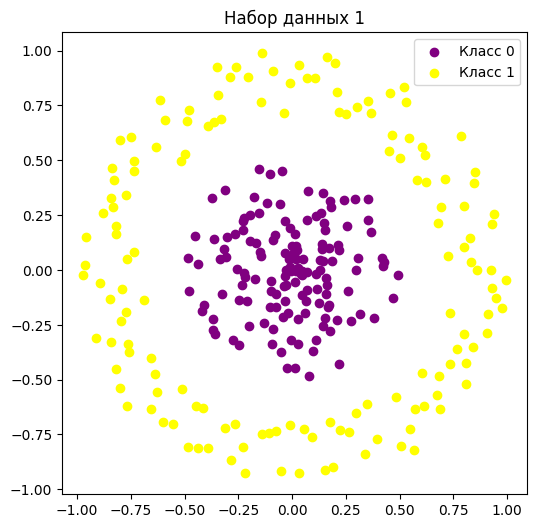

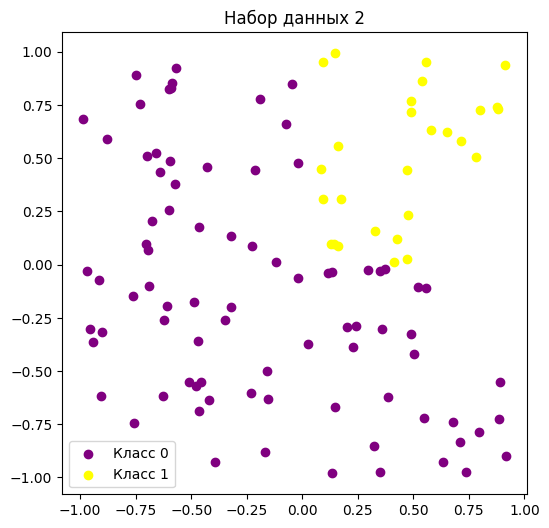

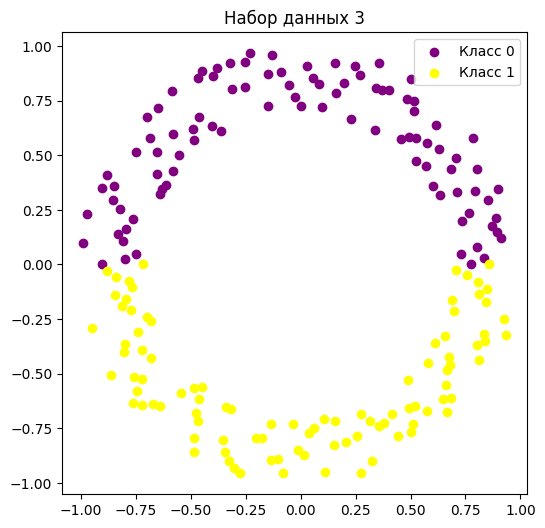

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Функция для обучения и тестирования KNN и оценки производительности
def train_test_knn(X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, confusion

# Генерация данных для первого набора
np.random.seed(0)
n_samples = np.random.randint(100, 201)
theta = np.linspace(0, 2 * np.pi, n_samples)
r_inner = np.random.uniform(0, 0.5, n_samples)
r_outer = np.random.uniform(0.7, 1.0, n_samples)
x_inner = r_inner * np.cos(theta)
y_inner = r_inner * np.sin(theta)
x_outer = r_outer * np.cos(theta)
y_outer = r_outer * np.sin(theta)

X1 = np.vstack((np.vstack((x_inner, y_inner)).T, np.vstack((x_outer, y_outer)).T))
y1 = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Генерация данных для второго набора
n_samples = np.random.randint(100, 201)
X2 = np.zeros((n_samples, 2))
y2 = np.zeros(n_samples)

# Разделяем данные на четыре четверти
n_samples_per_quarter = n_samples // 4

# Первая четверть желтая
X2[:n_samples_per_quarter, 0] = np.random.uniform(-1, 0, n_samples_per_quarter)
X2[:n_samples_per_quarter, 1] = np.random.uniform(0, 1, n_samples_per_quarter)

# Вторая четверть фиолетовая
X2[n_samples_per_quarter:2 * n_samples_per_quarter, 0] = np.random.uniform(0, 1, n_samples_per_quarter)
X2[n_samples_per_quarter:2 * n_samples_per_quarter, 1] = np.random.uniform(0, 1, n_samples_per_quarter)

# Третья четверть желтая
X2[2 * n_samples_per_quarter:3 * n_samples_per_quarter, 0] = np.random.uniform(-1, 0, n_samples_per_quarter)
X2[2 * n_samples_per_quarter:3 * n_samples_per_quarter, 1] = np.random.uniform(-1, 0, n_samples_per_quarter)

# Четвертая четверть фиолетовая
X2[3 * n_samples_per_quarter:, 0] = np.random.uniform(0, 1, n_samples - 3 * n_samples_per_quarter)
X2[3 * n_samples_per_quarter:, 1] = np.random.uniform(-1, 0, n_samples - 3 * n_samples_per_quarter)

y2[n_samples_per_quarter:2 * n_samples_per_quarter] = 1

# Генерация данных для третьего набора
n_samples = np.random.randint(100, 201)
X3 = np.zeros((n_samples, 2))
y3 = np.zeros(n_samples)

# Генерируем верхнюю дугу
n_samples_upper = n_samples // 2
theta_upper = np.linspace(0, np.pi, n_samples_upper)
r_upper = np.random.uniform(0.7, 1.0, n_samples_upper)
X3[:n_samples_upper, 0] = r_upper * np.cos(theta_upper)
X3[:n_samples_upper, 1] = r_upper * np.sin(theta_upper)

# Генерируем нижнюю дугу
n_samples_lower = n_samples - n_samples_upper
theta_lower = np.linspace(np.pi, 2*np.pi, n_samples_lower)
r_lower = np.random.uniform(0.7, 1.0, n_samples_lower)
X3[n_samples_upper:, 0] = r_lower * np.cos(theta_lower)
X3[n_samples_upper:, 1] = r_lower * np.sin(theta_lower)

y3[n_samples_upper:] = 1

# Разделяем данные на обучающий и тестовый наборы для каждого набора данных
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

# Построение графиков для каждого набора данных
plt.figure(figsize=(6, 6))
plt.scatter(X1[y1 == 0][:, 0], X1[y1 == 0][:, 1], c='purple', label='Класс 0')
plt.scatter(X1[y1 == 1][:, 0], X1[y1 == 1][:, 1], c='yellow', label='Класс 1')
plt.title('Набор данных 1')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], c='purple', label='Класс 0')
plt.scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], c='yellow', label='Класс 1')
plt.title('Набор данных 2')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X3[y3 == 0][:, 0], X3[y3 == 0][:, 1], c='purple', label='Класс 0')
plt.scatter(X3[y3 == 1][:, 0], X3[y3 == 1][:, 1], c='yellow', label='Класс 1')
plt.title('Набор данных 3')
plt.legend()
plt.show()

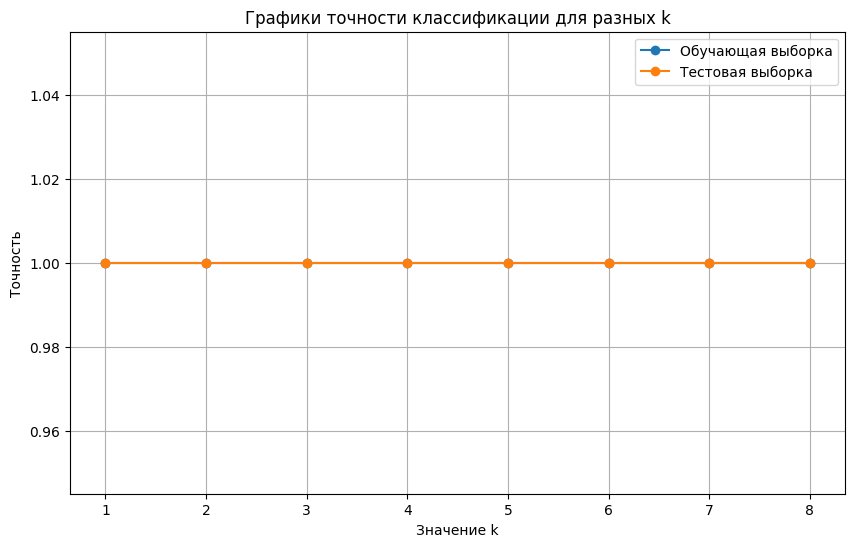

Результаты для k = 1:
Точность: 1.00
Полнота: 1.00
Точность: 1.00
F1-мера: 1.00
Матрица расхождений:
[[27  0]
 [ 0 31]]


Результаты для k = 2:
Точность: 1.00
Полнота: 1.00
Точность: 1.00
F1-мера: 1.00
Матрица расхождений:
[[27  0]
 [ 0 31]]


Результаты для k = 3:
Точность: 1.00
Полнота: 1.00
Точность: 1.00
F1-мера: 1.00
Матрица расхождений:
[[27  0]
 [ 0 31]]


Результаты для k = 4:
Точность: 1.00
Полнота: 1.00
Точность: 1.00
F1-мера: 1.00
Матрица расхождений:
[[27  0]
 [ 0 31]]


Результаты для k = 5:
Точность: 1.00
Полнота: 1.00
Точность: 1.00
F1-мера: 1.00
Матрица расхождений:
[[27  0]
 [ 0 31]]


Результаты для k = 6:
Точность: 1.00
Полнота: 1.00
Точность: 1.00
F1-мера: 1.00
Матрица расхождений:
[[27  0]
 [ 0 31]]


Результаты для k = 7:
Точность: 1.00
Полнота: 1.00
Точность: 1.00
F1-мера: 1.00
Матрица расхождений:
[[27  0]
 [ 0 31]]


Результаты для k = 8:
Точность: 1.00
Полнота: 1.00
Точность: 1.00
F1-мера: 1.00
Матрица расхождений:
[[27  0]
 [ 0 31]]




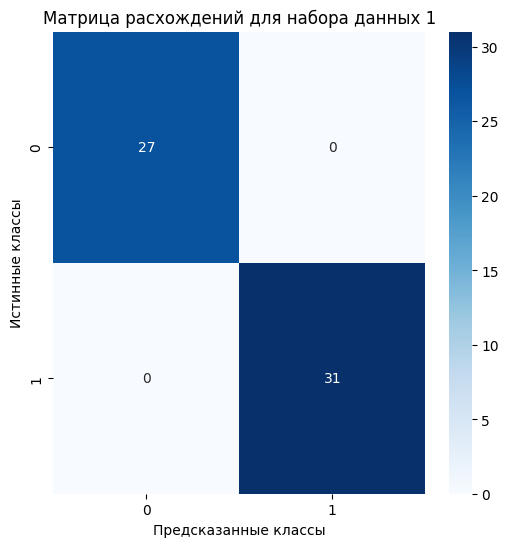

In [2]:
# Функция для построения графиков точности классификации для разных k
def plot_accuracy(X_train, y_train, X_test, y_test, k_values):
    train_accuracy = []
    test_accuracy = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, train_accuracy, marker='o', label='Обучающая выборка')
    plt.plot(k_values, test_accuracy, marker='o', label='Тестовая выборка')
    plt.title('Графики точности классификации для разных k')
    plt.xlabel('Значение k')
    plt.ylabel('Точность')
    plt.legend()
    plt.grid(True)
    plt.show()

# Разделяем набор данных на обучающую и тестовую выборки (80/20)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

# Значения k для KNN
k_values = range(1, 9)

# Построим графики точности классификации для набора данных 1
plot_accuracy(X1_train, y1_train, X1_test, y1_test, k_values)

# Обучаем и тестируем KNN для набора данных 1 с разными значениями k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)
    y1_pred = knn.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    precision = precision_score(y1_test, y1_pred)
    recall = recall_score(y1_test, y1_pred)
    f1 = f1_score(y1_test, y1_pred)
    confusion = confusion_matrix(y1_test, y1_pred)
    
    print(f"Результаты для k = {k}:")
    print(f"Точность: {accuracy:.2f}")
    print(f"Полнота: {precision:.2f}")
    print(f"Точность: {recall:.2f}")
    print(f"F1-мера: {f1:.2f}")
    print("Матрица расхождений:")
    print(confusion)
    print("\n")

# Построим матрицу расхождений для набора данных 1
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Предсказанные классы")
plt.ylabel("Истинные классы")
plt.title("Матрица расхождений для набора данных 1")
plt.show()

**Задание 2**

Этот блок сначала вычисляет матрицу расхождений, затем использует ее для вычисления метрик precision, recall и f1-score для каждого класса, и, наконец, выводит таблицу метрик, общую точность (accuracy), средние метрики (macro avg) и взвешенные метрики (weighted avg).

In [3]:
import numpy as np

# Истинные значения и результат системы
y_true = ["Cat"] * 6 + ["Fish"] * 10 + ["Hen"] * 9
y_pred = ["Cat", "Cat", "Cat", "Cat", "Hen", "Fish", "Cat", "Cat", "Cat", "Cat",
         "Cat", "Cat", "Hen", "Hen", "Fish", "Fish", "Cat", "Cat", "Cat", "Hen",
         "Hen", "Hen", "Hen", "Hen"]

# Уникальные классы
classes = np.unique(np.concatenate((y_true, y_pred)))

# Инициализация матрицы расхождений
confusion_matrix = np.zeros((len(classes), len(classes)), dtype=int)

# Заполнение матрицы расхождений
for true_class, pred_class in zip(y_true, y_pred):
    true_idx = np.where(classes == true_class)[0][0]
    pred_idx = np.where(classes == pred_class)[0][0]
    confusion_matrix[true_idx][pred_idx] += 1

# Функция для вычисления метрик precision, recall и f1-score
def calculate_metrics(confusion_matrix):
    metrics = []
    for i in range(len(confusion_matrix)):
        true_positive = confusion_matrix[i][i]
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1_score = 2 * (precision * recall) / (precision + recall)
        metrics.append([precision, recall, f1_score])
    return metrics

# Вычисление метрик precision, recall и f1-score
metrics = calculate_metrics(confusion_matrix)

# Вывод матрицы расхождений
for row in confusion_matrix:
    print(" ".join(map(str, row)))

# Вывод метрик для каждого класса
for i, class_name in enumerate(classes):
    precision, recall, f1_score = metrics[i]
    support = np.sum(confusion_matrix[i])
    print(f"{class_name}  {precision:.3f}   {recall:.3f}   {f1_score:.3f}   {support:d}")

# Вычисление общей точности (accuracy)
accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
print(f"\naccuracy                   {accuracy:.3f}   {np.sum(confusion_matrix):d}")

# Вычисление средних метрик (macro avg)
macro_avg = np.mean(metrics, axis=0)
print(f"macro avg  {macro_avg[0]:.3f}  {macro_avg[1]:.3f}    {macro_avg[2]:.3f}   {np.sum(confusion_matrix):d}")

# Вычисление взвешенных метрик (weighted)
weighted_avg = np.average(metrics, axis=0, weights=np.sum(confusion_matrix, axis=1))
print(f"weighted    {weighted_avg[0]:.3f}  {weighted_avg[1]:.3f}   {weighted_avg[2]:.3f}   {np.sum(confusion_matrix):d}")


4 1 1
6 2 2
3 0 5
Cat  0.308   0.667   0.421   6
Fish  0.667   0.200   0.308   10
Hen  0.625   0.625   0.625   8

accuracy                   0.458   24
macro avg  0.533  0.497    0.451   24
weighted    0.563  0.458   0.442   24


****

**Задание 3**

В данном блоке проводится анализ точности простых линейных регрессионных моделей, обученных на сгенерированных данных с точками, предсказывая целевую переменную по отдельным координатам X и Y, и измеряя коэффициент детерминации (R^2) для каждой из них.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Генерация данных
np.random.seed(0)
n_samples = np.random.randint(100, 201)
theta = np.linspace(0, 2 * np.pi, n_samples)
r_inner = np.random.uniform(0, 0.5, n_samples)
r_outer = np.random.uniform(0.7, 1.0, n_samples)
x_inner = r_inner * np.cos(theta)
y_inner = r_inner * np.sin(theta)
x_outer = r_outer * np.cos(theta)
y_outer = r_outer * np.sin(theta)

X = np.vstack((np.vstack((x_inner, y_inner)).T, np.vstack((x_outer, y_outer)).T))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обучение простой линейной регрессии для каждой переменной
lin_reg_x = LinearRegression()
lin_reg_y = LinearRegression()

lin_reg_x.fit(X_train[:, 0].reshape(-1, 1), y_train)
lin_reg_y.fit(X_train[:, 1].reshape(-1, 1), y_train)

# Предсказание на тестовом наборе данных
y_pred_x = lin_reg_x.predict(X_test[:, 0].reshape(-1, 1))
y_pred_y = lin_reg_y.predict(X_test[:, 1].reshape(-1, 1))

# Вычисление R^2 для каждой модели
r2_x = r2_score(y_test, y_pred_x)
r2_y = r2_score(y_test, y_pred_y)

print(f"R^2 для модели по X: {r2_x:.2f}")
print(f"R^2 для модели по Y: {r2_y:.2f}")


R^2 для модели по X: -0.01
R^2 для модели по Y: -0.01
